# Итоговое задание по Модулю 13.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
churn_data = pd.read_csv('churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)

CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

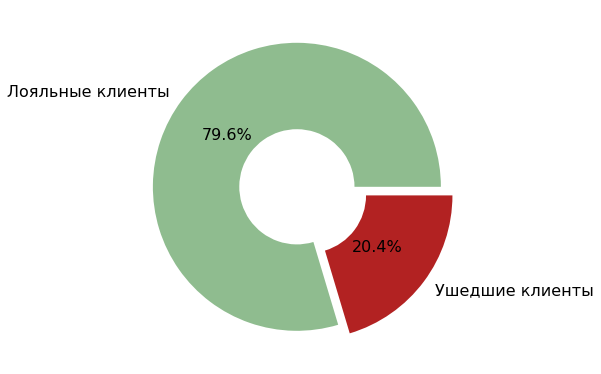

In [ ]:
fig1 = plt.figure(figsize=(5, 5))
axes = fig1.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data['Exited'].value_counts(),
    wedgeprops=dict(width=0.6),
    colors=('darkseagreen', 'firebrick'),
    explode = (0, 0.1),
    labels=['Лояльные клиенты','Ушедшие клиенты'],
    textprops={'fontsize': 16},
    autopct='%.1f%%'
);

#### 9.1 Вывод:
*Доля ушедших клиентов примерно в 4 раза меньше доли лояльных и составляет около 20%. Каждый пятый клиент покидает банк.*

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение, и сделайте выводы.

Доля клиентов банка с балансом ниже $2500 (в процентах): 36.17


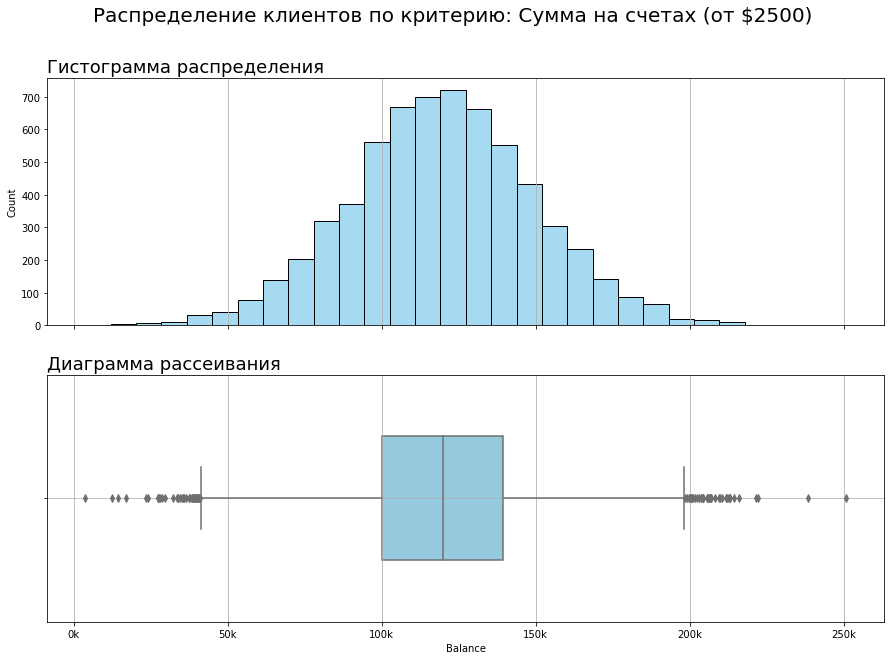

In [ ]:
count_zero_balance = churn_data[churn_data['Balance'] < 2500].shape[0]
part_zero_balance = (count_zero_balance / churn_data.shape[0]) * 100

print('Доля клиентов банка с балансом ниже $2500 (в процентах):', part_zero_balance)

fig2, ax = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(15, 10))

ax[0].set_title('Гистограмма распределения', ha='left', x=.0, fontsize=18)
ax[1].set_title('Диаграмма рассеивания', ha='left', x=.0, fontsize=18)

sns.histplot(
    data=churn_data[churn_data['Balance'] >= 2500]['Balance'],
    ax=ax[0],
    bins=30,
    color='skyblue'
).xaxis.grid()

sns.boxplot(
    data=churn_data[churn_data['Balance'] >= 2500],
    x='Balance',
    ax=ax[1],
    color='skyblue',
    width=0.5,
    orient='h'
).grid()

ax[1].set_xticks(ax[1].get_xticks()[1:-1])

x_labels = ['{:,.0f}'.format(x) + 'k' for x in list(ax[1].get_xticks()/1000)]
ax[1].set_xticklabels(x_labels)

plt.suptitle('Распределение клиентов по критерию: Сумма на счетах (от $2500)', size=20);

#### 9.2 Вывод:
*Если отбросить клиентов с балансом до $2500, а это чуть больше трети, то:*
*- распределение средств на анализируемых счетах имеет симметричную и довольно плотную структуру;*
*- половина из исследуемых клиентов хранит в банке сумму в диапазоне от 100 до 140 тысяч;*
*- медианное значение находится на уровне 120 тысяч;*
*- общий разброс значений средств на счетах, за исключением выбросов, находится в диапазоне от 40 до 200 тысяч.*
*Клиенты банка довольно однородны по суммам хранимым на счетах банка. Это может очень облегчить выработку стратегии по удержанию клиентов и формированию выгодных для подавляющего большинства клиентов предложений.*

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

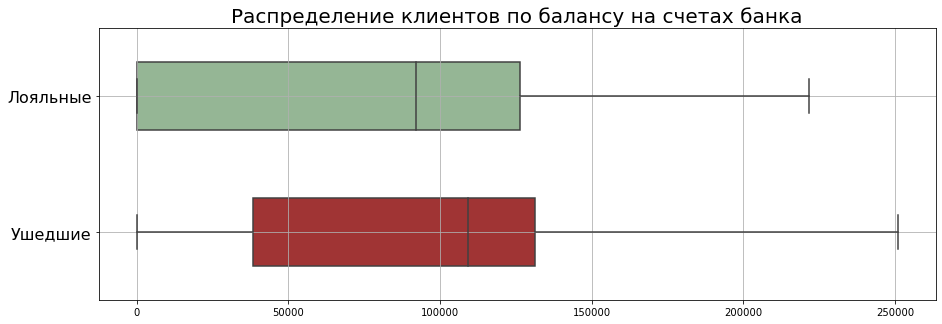

In [ ]:
fig3 = plt.figure(figsize=(15, 5))

boxplot = sns.boxplot(
    data=churn_data.pivot_table(values='Balance', index='CustomerId', columns='Exited'),
    palette=['darkseagreen', 'firebrick'],
    width=0.5,
    orient='h'
)

boxplot.set_title('Распределение клиентов по балансу на счетах банка', fontsize=20)
boxplot.set_ylabel('')
boxplot.set_yticklabels(['Лояльные','Ушедшие'], fontsize=16)
boxplot.grid()

#### 9.3 Вывод:
*Распределения балансов в разрезе лояльности довольно сильно отличаются по количеству нулевых и близких к нулю счетов. Доля нулевых балансов у лояльных клиентов выше 25%. В то время как у ушедших эта доля - значительно ниже и, в целом, средние суммы на счетах банка выше. Возможно, ушедших клиентов не устраивали условия по хранению средств и обслуживанию ненулевых счетов.*
*Вероятно, у банка были не самые выгодные предложения по депозитам, в отличие от, например, конкурентов.*

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

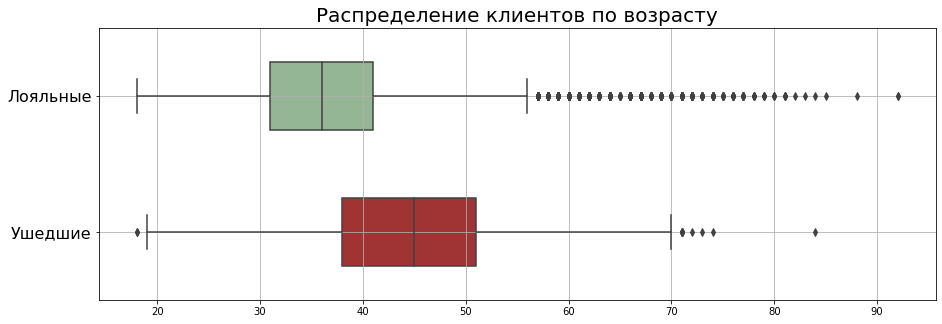

In [ ]:
fig4 = plt.figure(figsize=(15, 5))
boxplot = sns.boxplot(
    data=churn_data.pivot_table(values='Age', index='CustomerId', columns='Exited'),
    palette=['darkseagreen', 'firebrick'],
    width=0.5,
    orient='h'
)
boxplot.set_title('Распределение клиентов по возрасту', fontsize=20)
boxplot.set_ylabel('')
boxplot.set_yticklabels(['Лояльные','Ушедшие'], fontsize=16)
boxplot.grid()

#### 9.4 Вывод:
*На графике четко видно, что среди ушедших клиентов - выше доля клиентов старшей возрастной группы. Отличие медианного возраста составляет около 10 лет. Возрастная группа ушедших клиентов - от 18 до 70, причем половина - это люди среднего возраста (от 37 до 51). В то время как лояльные - это более молодая группа людей, из которых 75% - это клиенты в возрасте до 41 года. Потенциальные выбросы в группе лояльных клиентов - это несколько десятков значений от 55 лет. То есть, в лояльной группе возраст клиента 55+ - это совершенно нехарактерное значение, в то время как среди ушедших - клиентов от 51 до 70 около четверти.*
*Банку однозначно стоит обратить внимание на клиентов средней и старшей возрастных групп от 40 лет. Тем более, скорее всего, это и наиболее выгодные для банка клиенты, имеющие достаточные накопления и необходимость выгодно их инвестировать.*

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

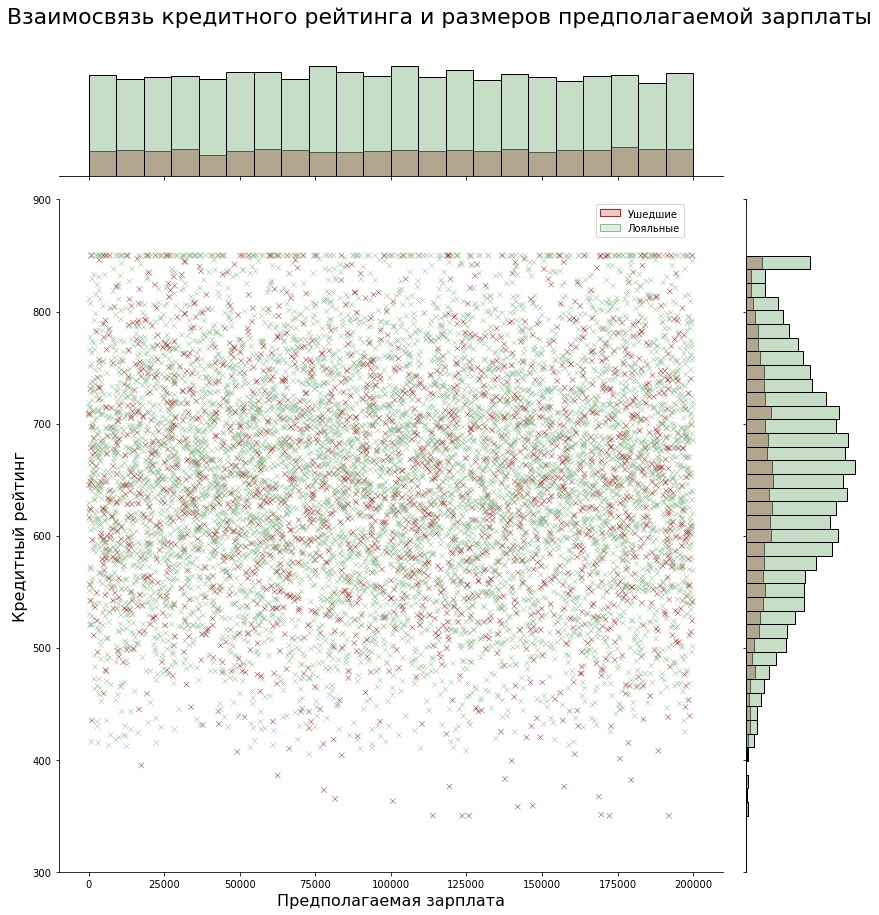

In [ ]:
plot = sns.jointplot(
    data=churn_data[['EstimatedSalary', 'CreditScore', 'Exited']],
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited',
    palette=('darkseagreen', 'firebrick'),
    marker='x',
    s=30,
    clip_on=False,
    legend=False,
    height=12,
    xlim=(-10000, 210000),
    ylim=(300, 900)
).plot_marginals(sns.histplot)

plot.set_axis_labels('Предполагаемая зарплата', 'Кредитный рейтинг', fontsize=16)
plot.fig.suptitle('Взаимосвязь кредитного рейтинга и размеров предполагаемой зарплаты', fontsize=22, y=1.05)
plt.legend(labels = ['Ушедшие', 'Лояльные'], bbox_to_anchor=(-0.5, 1));

#### 9.5 Вывод:
*Никакой явной корреляции показателей кредитного рейтинга и величины заработной платы на графике не выявляется. Как среди лояльных, так и среди ушедших клиентов зависимости параметров друг от друга не прослеживается. Пожалуй, можно только отметить небольшое количество экстремально низких показателей кредитного рейтинга среди ушедших клиентов.*

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

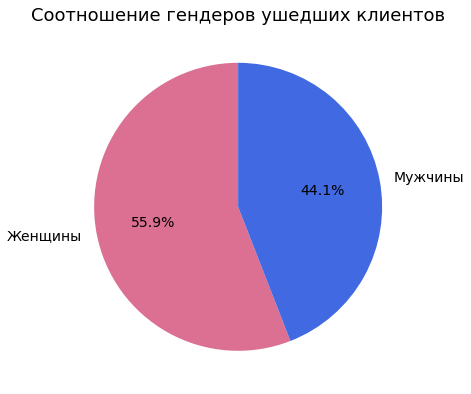

In [ ]:
fig6_1 = plt.figure(figsize=(5, 5))
axes = fig6_1.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data[churn_data['Exited'] == 1]['Gender'].value_counts(),
    colors=('palevioletred', 'royalblue'),
    labels=['Женщины','Мужчины'],
    startangle=90,
    textprops={'fontsize': 14},
    autopct='%.1f%%'
)
plt.title('Соотношение гендеров ушедших клиентов', size=18);

*На графике видно, что доля женщин, прекращающих обслуживаться в банке на 10 пунктов выше, доли мужчин. Однако быстрый вывод о том, что женщины уходят чаще может быть ошибочным. Возможно такова структура клиентов банка и женщин клиентов больше, чем мужчин. Соответственно и покидают банк они в той же пропорции, что и приходят.*
*Посмотрим на соотношение гендеров всех клиентов и в разрезе лояльности:*

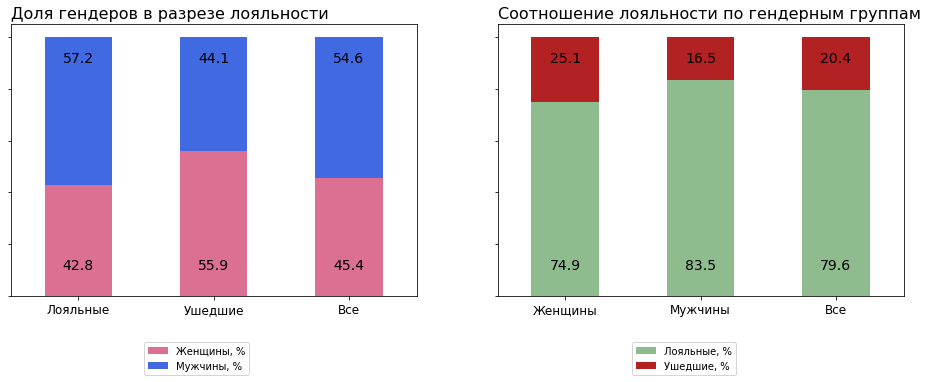

In [ ]:
pivot_gender = churn_data.pivot_table(
    values='CustomerId',
    index='Gender',
    columns='Exited',
    aggfunc='count'
)
pivot_gender['all'] = pivot_gender[0] + pivot_gender[1]
pivot_gender_norm = pivot_gender.apply(lambda x:100 * x / float(x.sum())).round(2)

pivot_exited = churn_data.pivot_table(
    values='CustomerId',
    index='Exited',
    columns='Gender',
    aggfunc='count'
)
pivot_exited['all'] = pivot_exited['Female'] + pivot_exited['Male']
pivot_exited_norm = pivot_exited.apply(lambda x:100 * x / float(x.sum())).round(2)

fig6_2, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))


def draw_plot(pos, data=None, title=None, flavor=None, labels=None, legend_name=None):
    pos.set_title(title, ha='left', x=.0, fontsize=16)
    pos.set_yticklabels('')
    data.transpose().plot(ax=pos, kind="bar", stacked=True, legend=False, color=flavor)
    pos.set_xticklabels(labels, fontsize=12)
    pos.xaxis.set_tick_params(rotation=0)
    pos.set_xlabel('')
    pos.legend(legend_name, bbox_to_anchor=(0.6, -0.15))


    for k, item in enumerate(pos.patches):
        y = 10 if k in [0,1,2] else 90
        pos.annotate(format(item.get_height(), '.1f'),
                     (item.get_x() + item.get_width() / 2, y),
                     ha='center', va='center',
                     size=14, xytext=(0, 5),
                     textcoords='offset points')


draw_plot(ax[0],
    data=pivot_gender_norm,
    title='Доля гендеров в разрезе лояльности',
    flavor=['palevioletred', 'royalblue'],
    labels=['Лояльные', 'Ушедшие', 'Все'],
    legend_name=['Женщины, %', 'Мужчины, %']
)

draw_plot(ax[1],
    data=pivot_exited_norm,
    title='Соотношение лояльности по гендерным группам',
    flavor=['darkseagreen', 'firebrick'],
    labels=['Женщины', 'Мужчины', 'Все'],
    legend_name=['Лояльные, %', 'Ушедшие, %']
);

#### 9.6 Вывод:
*Теперь очевидно - то, что доля женщин среди ушедших клиентов выше, доли мужчин, объясняется не общим соотношением гендеров всех клиентов банка. Каждая четвертая женщина уходит из банка, в то время, как среди мужчин покидает банк только каждый шестой клиент. Возможно не хватает специфических маркетинговых предложений, направленных именно на поддержание лояльности среди женской аудитории.*

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

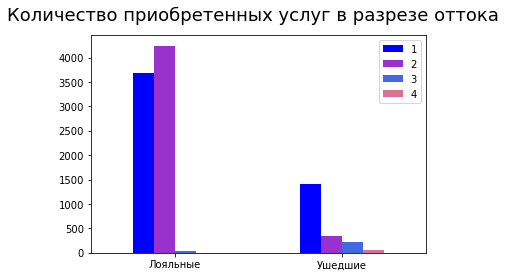

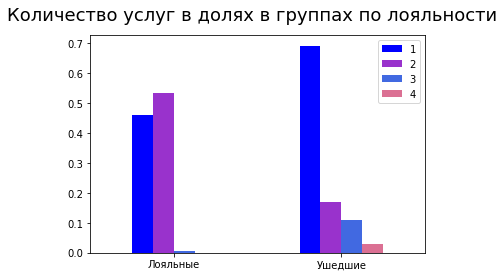

In [ ]:
pivot_count_prod = pd.DataFrame({
    'Лояльные': churn_data[churn_data['Exited'] == 0]['NumOfProducts'].value_counts(),
    'Ушедшие': churn_data[churn_data['Exited'] == 1]['NumOfProducts'].value_counts()
}).transpose()

plot_count_prod = pivot_count_prod.plot(
    kind='bar', color=['blue', 'darkorchid', 'royalblue', 'palevioletred'], rot=0
)
plt.suptitle('Количество приобретенных услуг в разрезе оттока', size=18)

pivot_share_prod = pd.DataFrame({
    'Лояльные': churn_data[churn_data['Exited'] == 0]['NumOfProducts'].value_counts(normalize=True),
    'Ушедшие': churn_data[churn_data['Exited'] == 1]['NumOfProducts'].value_counts(normalize=True)
}).transpose()

plot_share_prod = pivot_share_prod.plot(
    kind='bar', color=['blue', 'darkorchid', 'royalblue', 'palevioletred'], rot=0
)
plt.suptitle('Количество услуг в долях в группах по лояльности', size=18);

#### 9.7 Вывод:
*Очевидно, что среди ушедших клиентов подавляющее большинство остановилось на приобретении только 1 услуги. Около 70% ушедших клиентов воспользовались только разовым предложением и не заинтересовались дополнительными услугами. В то время как среди лояльных больше половины пользуются 2 и более услугами банка. Также интересно, что в группе ушедших доля тех, кто приобрел более 2 услуг значительно выше, чем в группе лояльных. Возможно, пользоваться более чем 2 продуктами банка не очень удобно.*

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

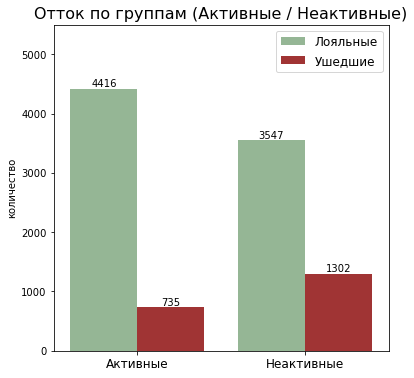

In [ ]:
fig8 = plt.figure(figsize=(6, 6))

plot_activity = sns.countplot(
    data=churn_data,
    x='IsActiveMember',
    order=[1,0],
    hue='Exited',
    palette=['darkseagreen', 'firebrick']
)

for p in plot_activity.patches:
    plot_activity.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
    ha='center', va='bottom')

plot_activity.set_title('Отток по группам (Активные / Неактивные)', size=16)
plot_activity.legend(['Лояльные', 'Ушедшие'], fontsize=12)
plot_activity.set(xlabel='', ylabel='количество')
plot_activity.set(ylim=[0, 5500])
plot_activity.set_xticklabels(['Активные', 'Неактивные'], fontsize=12);

#### 9.8 Вывод:
*Активный статус клиента в достаточной степени влияет на снижение вероятности оттока. В группе Активных - уходит только каждый седьмой, в то время как в группе Неактивных - чаще, чем каждый третий. Среди ушедших - только третья часть были активными, а среди лояльных - активных больше половины. Чтобы уменьшить отток можно предложить банку повышать активность клиентов. Стимулировать приобретение новых услуг, например.*

### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:

countries = churn_data.groupby('Geography')['Geography'].count()
country_count = np.array(churn_data.groupby('Geography')['CustomerId'].count())
exited_count = np.array(churn_data[churn_data['Exited'] == 1].groupby('Geography')['CustomerId'].count())
exited_share = np.round(exited_count / country_count * 100).tolist()

data_geo = pd.DataFrame({'country': countries.index.tolist(), 'exited_share': exited_share})

fig9 = px.choropleth(
    data_frame=data_geo,
    locations='country',
    locationmode = 'country names',
    color='exited_share',
    range_color=[0, 100],
    title='Интенсивность доли оттока по странам',
    width=800,
    height=500,
    color_continuous_scale='Bluered'
)
fig9.show();
#Рисунок сохнанен в папке в файле geo.png

#### 9.9 Вывод:
*Из трех стран, в которых работает банк - отток клиентов в Германии в два раза выше, чем в Испании или во Франции. Очевидно, что немецкое подразделений вдвое менее эффективно удерживает клиентов от ухода.*
*Это может быть вызвано такими факторами как:*
*- неэффективный менеджмент филиала;*
*- недостаточное количество в регионе предложений банка, направленных на повышение лояльности;*
*- невозможность внедрить те или иные предложения, например, из-за специфичности законодательства страны;*
*- рекламные компании успешные в одних странах, из-за особенностей национального восприятия, могут быть неэффективны в других.*

### 9.10. Переведите числовой признак CreditScore в категориальный. Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей. На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

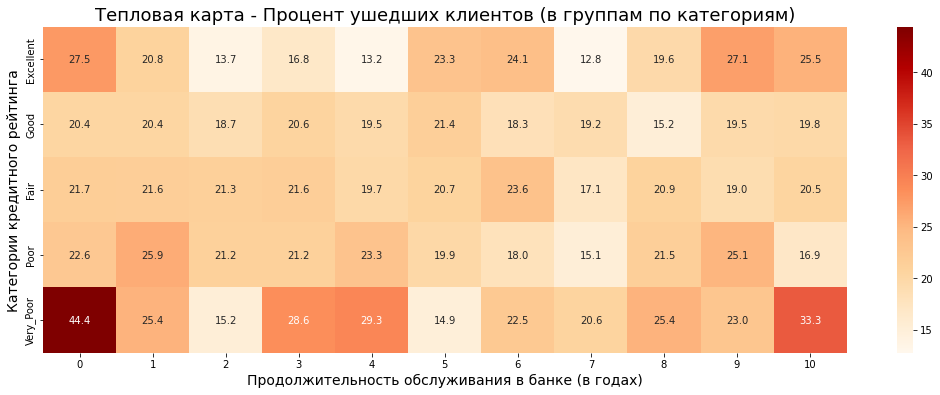

In [ ]:
def get_credit_score_cat(credit_score):
    category = {
        credit_score < 300: 'Deep',
        300 <= credit_score < 500: 'Very_Poor',
        500 <= credit_score < 601: 'Poor',
        601 <= credit_score < 661: 'Fair',
        661 <= credit_score < 781: 'Good',
        781 <= credit_score < 851: 'Excellent',
        credit_score >= 851: 'Top'
    }
    return category[True]


churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat).astype('category')
pivot_exited_cat = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)
pivot_exited_cat = pivot_exited_cat * 100
pivot_exited_cat.index = pd.CategoricalIndex(pivot_exited_cat.index,
    categories= ['Top', 'Excellent', 'Good', 'Fair', 'Poor', 'Very_Poor', 'Deep'])
pivot_exited_cat.sort_index(level=0, ascending=True, inplace=True)

fig10_1, ax = plt.subplots(1, 1, figsize = (18, 6))
heatmap_credit_cat = sns.heatmap(
    data=pivot_exited_cat,
    annot=True,
    fmt='.1f',
    cmap='OrRd'
)
ax.set_ylabel('Категории кредитного рейтинга', fontsize=14)
ax.set_xlabel('Продолжительность обслуживания в банке (в годах)', fontsize=14)
heatmap_credit_cat.set_title('Тепловая карта - Процент ушедших клиентов (в группам по категориям)', fontsize=18);

*В-целом, показатели оттока тем ниже, чем более высокому кредитному рейтингу соответствует категория клиента и, чем дольше клиент обслуживается в банке. Однако в эту гипотезу не вполне вписываются "крайние" строки и столбцы. Скорее всего это связано с недостаточной репрезентативностью выборки.*
*Проверим эту гипотезу, построив тепловую карту количества ушедших клиентов:*

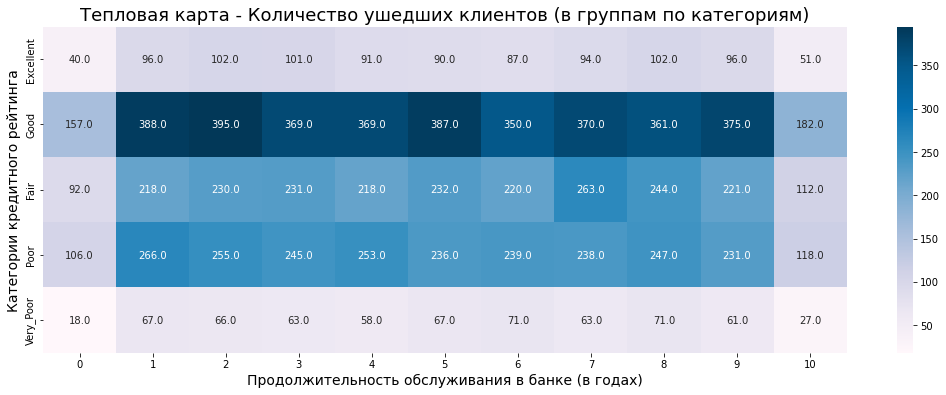

In [ ]:
pivot_exited_count = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='count'
)
pivot_exited_count.index = pd.CategoricalIndex(pivot_exited_count.index,
    categories= ['Top', 'Excellent', 'Good', 'Fair', 'Poor', 'Very_Poor', 'Deep'])
pivot_exited_count.sort_index(level=0, ascending=True, inplace=True)

fig10_2, ax = plt.subplots(1, 1, figsize = (18, 6))
heatmap_credit_cat = sns.heatmap(
    data=pivot_exited_count,
    annot=True,
    fmt='.1f',
    cmap='PuBu'
)
ax.set_ylabel('Категории кредитного рейтинга', fontsize=14)
ax.set_xlabel('Продолжительность обслуживания в банке (в годах)', fontsize=14)
heatmap_credit_cat.set_title('Тепловая карта - Количество ушедших клиентов (в группам по категориям)', fontsize=18);

#### 9.10 Вывод:
*Теперь видно, что неоднозначность тенденций крайних строк и столбцов карты частично может быть вызвана меньшей репрезентативностью данных в этих категориях. Клиенты из категорий с большим кредитным рейтингом реже покидают банк. Также положительно на уменьшении доли оттока сказывается продолжительность обслуживания в банке. За исключением показателей в группах с очень длительным сроком обслуживания. Самые низкие показатели оттока демонстрируют группы клиентов, которые обслуживаются в банке от 2 до 8 лет.*